<a href="https://colab.research.google.com/github/KondratovaLudmila/parking_system/blob/feature%2Focr/parking_system/numberplate_ukr/EasyOCR_ukr_plates_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import json
import os

from glob import glob
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# load data
images = glob("/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/img/*")
json_files = glob("/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/ann/*")

In [4]:
#image ID
image_id = images[0].split('/')[-1].split('.')[0]
image_id

'05838TB_40147'

# Easy OCR

In [5]:
!pip install easyocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 66.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 40.3 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manyl

In [6]:
import easyocr

reader = easyocr.Reader(['uk'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

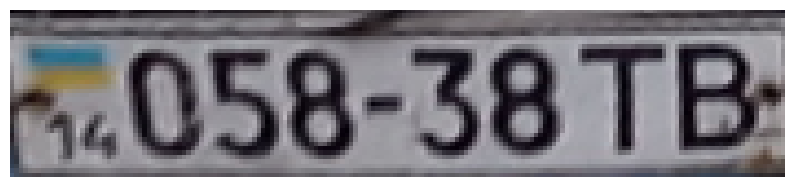

In [7]:
# Plot Example Images
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(plt.imread(images[0]))
ax.axis('off')
plt.show()

In [8]:
result = reader.readtext(images[0])
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

Text: 514, Probability: 0.1506499761104301
Text: 058-38ТВ, Probability: 0.9615756163724534


In [ ]:
# pd.DataFrame(result, columns=['bbox','text','conf'])

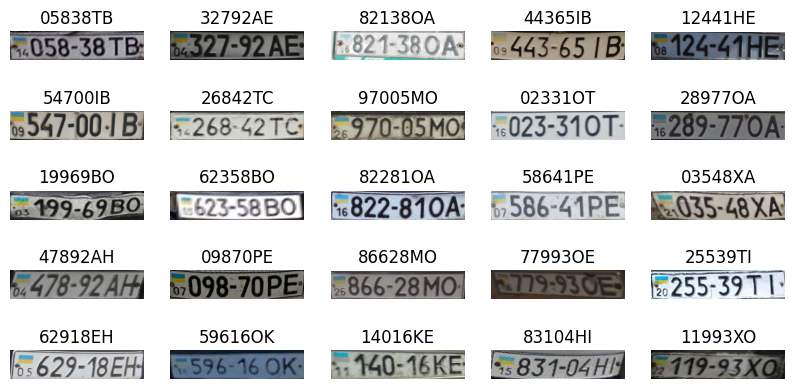

In [9]:
# Create a subplot with 5x5 grid
fig, axs = plt.subplots(5, 5, figsize=(10, 5))
axs = axs.flatten()

for i in range(25):
    image_path = images[i]
    axs[i].imshow(plt.imread(image_path))
    axs[i].axis('off')

    image_id = os.path.basename(image_path).rstrip('.png')
    json_path = f'/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/ann/{image_id}.json'

    with open(json_path) as file:
        data = json.load(file)
        description = data['description']

    axs[i].set_title(f'{description}')

plt.show()

In [12]:
# Licence Plate Recognition
import easyocr
reader = easyocr.Reader(['uk'])

for i in range(25):
    result = reader.readtext(images[i])

    image_path = images[i]
    image_id = os.path.basename(image_path).rstrip('.png')
    json_path = f'/content/drive/MyDrive/Colab Notebooks/Car Plates/dataset/ann/{image_id}.json'

    with open(json_path) as file:
        data = json.load(file)
        description = data['description']

    print(f'--plate {description}--')

    for (bbox, text, prob) in result:
        (top_left, top_right, bottom_right, bottom_left) = bbox
        print(f'Text: {text}, Probability: {prob}')


--plate 05838TB--
Text: 514, Probability: 0.1506499761104301
Text: 058-38ТВ, Probability: 0.9615756163724534
--plate 32792AE--
Text: 04, Probability: 0.9926271456855121
Text: 327-92АЕ, Probability: 0.6574543406479337
--plate 82138OA--
Text: 821-38ОА", Probability: 0.6921317647920244
--plate 44365IB--
Text: '0 9, Probability: 0.6164241298617645
Text: 443-651В, Probability: 0.9676522868111669
--plate 12441HE--
Text: 08, Probability: 0.9988180154017603
Text: 124-41НЕ, Probability: 0.7584989779380353
--plate 54700IB--
Text: 09, Probability: 0.9698992186814227
Text: 547-00]В, Probability: 0.5179856749900292
--plate 26842TC--
Text: 268 42Тс, Probability: 0.5087463826263929
--plate 97005MO--
Text: 970-05МО, Probability: 0.6547244744459002
--plate 02331OT--
Text: 16, Probability: 0.999982972715661
Text: 023-310Т:, Probability: 0.6708874491826543
--plate 28977OA--
Text: 16, Probability: 0.9999919078146757
Text: 289-77ОА:, Probability: 0.8411663978509035
--plate 19969BO--
Text: 199-69в0, Probabi

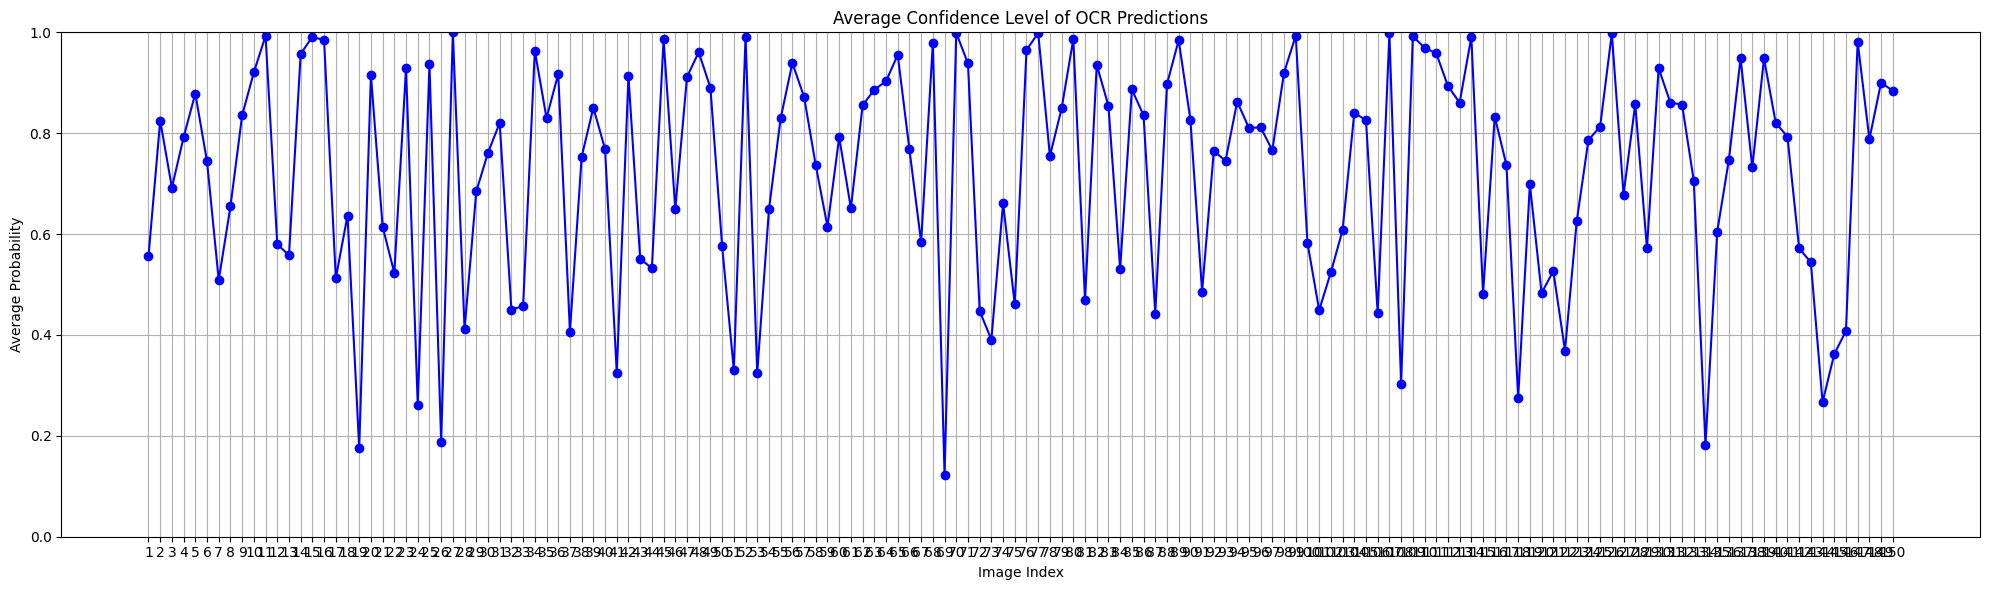

In [20]:
# images = ['path_to_image1.png', 'path_to_image2.png', ...]
average_probs = []

for i in range(150):
    result = reader.readtext(images[i])
# for img_path in images:
#     result = reader.readtext(img_path)

    # Calculate average probability for each image
    total_prob = sum(prob for (bbox, text, prob) in result)
    average_prob = total_prob / len(result) if len(result) > 0 else 0.0
    average_probs.append(average_prob)

# Plotting average probabilities
plt.figure(figsize=(20, 6))
plt.plot(range(1, 151), average_probs, marker='o', linestyle='-', color='b')
plt.title('Average Confidence Level of OCR Predictions')
plt.xlabel('Image Index')
plt.ylabel('Average Probability')
plt.ylim([0.0, 1.0])
plt.xticks(range(1, 151))
plt.grid(True)
plt.tight_layout()
plt.show()


*This approach allows to visualize the average confidence levels of OCR predictions across dataset using EasyOCR, providing insights into the reliability of the OCR results for license plate recognition.*

**Reading Text from Grayscale Images:** EasyOCR can read text from grayscale images as well. You just need to convert your image to grayscale before passing it to the readtext method.

This shows that EasyOCR is also able to read from grayscale images, first a simple text image is converted to grayscale and then passes to EasyOCR reader to recognize.

In [ ]:
from PIL import Image
import easyocr
img = Image.open('image.jpg').convert('L')
reader = easyocr.Reader(['uk'])
result = reader.readtext(img)
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')

**Handling Noisy Images:** If your image has a lot of noise, you can use image processing techniques to reduce the noise before passing the image to EasyOCR. Here cv2 library is used to reduce the noise and then that image is passed to EasyOCR reader to recognize.

In [ ]:
import cv2
import easyocr
img = cv2.imread('noisy_image.jpg', 0)
blur = cv2.GaussianBlur(img,(5,5),0)
reader = easyocr.Reader(['en'])
result = reader.readtext(blur)
for (bbox, text, prob) in result:
    print(f'Text: {text}, Probability: {prob}')